# Recitation 3: Probability Distributions, Likelihood, and LMFIT software

We will begin today by the concept of probability density functions, or PDFs, which are going to be key in the next parts of the class. There are two types of random variables, continuous and discrete. Discrete random variables can only take on discrete values, whereas continuous random variables can take on continuous values. For a discrete random variables, we define a probability mass function that defines the exact probability that the random variable will take a certain discrete value.

For continuous probability distributions, we have instead a probability density function, or PDF. The PDF $P(x)$ over the random variable $x$ is defined such that the probability that $x$ is between $a$ and $b$  is given by

$$p(a < x < b) = \int_{a}^{b} P(x) dx$$

Where I adopt the convention that lowercase $p$ represent probabilities, and uppercase $P$ denote probability densities. The most common probability distribution is the Gaussian, or normal distribution, which represents many natural phenomena, especially in physics. The normal distribution for a random variable $x_j$ with mean  $\mu_j$ and standard deviation $\sigma_j$ is given by

$$P(x_j) = \frac{1}{\sigma_j\sqrt{2\pi}} \exp(-\frac{1}{2}\frac{(x_j-\mu_j)^2}{\sigma_j^2})$$

Lets use numpy to make some plots of the various Gaussian distributions.

### Exercise 1:

Write code that plots, using matplotlib and numpy, the probability density functions (PDFs) for the following Gaussian distributions over random variable $x$ for $x \in (-5,5)$

1. $\mu=0, \sigma^2 = 0.2$
2. $\mu=0, \sigma^2 = 1.0$
3. $\mu=0, \sigma^2 = 5.0$
4. $\mu=-2, \sigma^2 = 0.5$

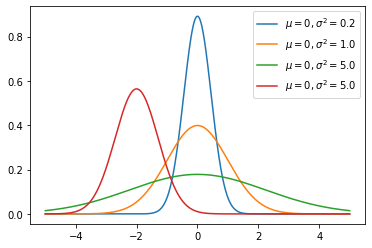

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5,5, 1000) #make a vector of points from -5 to 5 with 1000 data points

gaussmu0sig02 = (1/(np.sqrt(2*np.pi*0.2)))*np.exp(-0.5*x**2.0/0.2)
gaussmu0sig10 = (1/(np.sqrt(2*np.pi*1.0)))*np.exp(-0.5*x**2.0/1.0)
gaussmu0sig50 = (1/(np.sqrt(2*np.pi*5.0)))*np.exp(-0.5*x**2.0/5.0)
gaussmum2sig05 = (1/(np.sqrt(2*np.pi*0.5)))*np.exp(-0.5*(x+2)**2.0/0.5)

plt.plot(x, gaussmu0sig02, label = "$\mu=0, \sigma^2 = 0.2$")
plt.plot(x, gaussmu0sig10, label = "$\mu=0, \sigma^2 = 1.0$")
plt.plot(x, gaussmu0sig50, label = "$\mu=0, \sigma^2 = 5.0$")
plt.plot(x, gaussmum2sig05, label = "$\mu=0, \sigma^2 = 5.0$")
plt.legend()

We can define joint probability density functions, e.g. $P(x,y)$, for multi-variate probability distributions in a similar way. To find the probability that random variables $x, y$ are in a region $R$, from the joint probability density $P(x,y)$, we have

$p(x, y\in R) = \iint_{R} P(x, y) dx dy$

We define the single variable PDFs $P(x)$ and $P(y)$ by integrating (or marginalizing) the extra variable from the joint PDF, i.e. 

$P(x) = \int_{-\infty}^{\infty} P(x,y) dy$ and $P(y) = \int_{-\infty}^{\infty} P(x,y) dx$

We define the random variables $x$ and $y$ to be independent from one another if the joint PDF factors into the product of the two single-variable PDFs, i.e.

$P(x, y) = P(x) P(y)$

If we have $k$ different independently distributed variables $x_1, x_2, x_3...x_k$, then the joint probability distribution will be given by 

$P(x_1, x_2, ... x_k) = \frac{1}{ (2\pi)^{k/2}\prod_i \sigma_i} \exp(-\frac{1}{2}\sum_i \frac{(x_i- \mu_i)^2}{\sigma_i^2})$
This is the joint PDF for all the variables. Lets visualize a multivariate Gaussian of two random variables.

### Exercise 2:

Write code that plots, using matplotlib and numpy, the probability density functions (PDFs) for a multivariate Gaussian distribution over independent random variables $x$ and $y$ with mean $0$ and variance $1$ for both, over the region $x \in (-5,5), y\in(-5,5)$


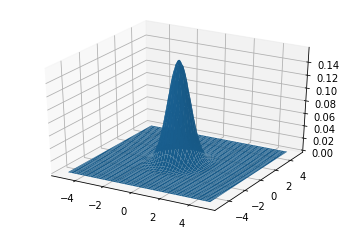

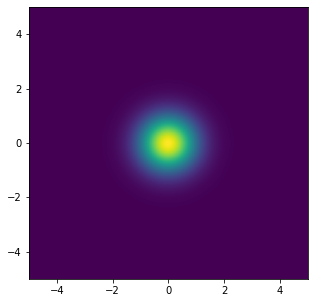

In [2]:
from mpl_toolkits.mplot3d import Axes3D 

fig1 = plt.figure()

ax = fig1.add_subplot(111, projection = '3d')

x = np.linspace(-5, 5, 1000)
y = np.linspace(-5, 5, 1000)


x,y = np.meshgrid(x,y)

p = (1/(2*np.pi))*np.exp(-(x**2.0+y**2.0))

ax.plot_surface(x,y,p)
fig2 = plt.figure(figsize = (5,5))
plt.pcolormesh(x,y,p)


Now, we are going to see how this applies to fitting. Let us first generate some data randomly from from the model $y=2x$.

<ErrorbarContainer object of 3 artists>

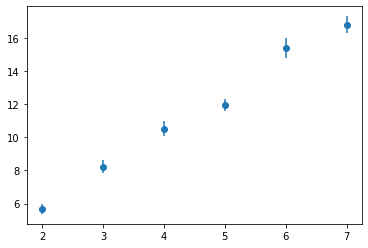

In [3]:
np.random.seed(2)

xi = np.array([2,3,4,5,6,7])
yerr = np.array([0.3, 0.4, 0.45, 0.35, 0.6, 0.5])
yi = 2*xi+yerr*np.random.normal(xi.shape)

plt.errorbar(xi, yi, yerr= yerr, fmt = 'o')

We would like to fit a line to this data. But first, how do we determine what the best fit line would be? Let $x_i$ be the x coordinates of the data points we observe, and let $f(x_i)$ be the model we are trying to fit. We assume that the data that we observe is generated from this model with some extra error, usually do to some sort of noise.

$$y_i = f(x_i) + \epsilon $$

where $\epsilon$ is a random variable drawn from a Gaussian distribution with mean $0$. Usually, in most physics experiments, we will be able to quantify the width of the distribution by making repeated measurements and calculating the standard error, which will give us a vector of standard errors, $\sigma_i$, which are usually plotted as errorbars like in the plot above.

### Exercise 3:
a) So, we assume that $y_i$ is a random variable with mean $f(x_i)$, and variance $\sigma_i^2$. Given this, what is the probability distribution for $y_i$?

b) Given the answer to a), and assuming that the probability distributions for each of the $y_i$ are independent, then we have



The probability distribution is given by 

$$P(y_i) = \frac{1}{\sigma_i\sqrt{2\pi}} \exp\left( -\frac{1}{2} \frac{(y_i - f(x_i))^2}{\sigma_i^2}\right)$$

If we assume each of the $y_i$ are indpendent random variables, we have the joint probabilty distribution given by

$$P(y_1, y_2, ... ) = \frac{1}{(2\pi)^{k/2}\prod_i\sigma_i} \exp\left( -\frac{1}{2} \sum_i\frac{(y_i - f(x_i))^2}{\sigma_i^2}\right)$$

Now, this is the probability distribution of observing the data given a particular model $f(x)$. This is known as the <b>likelihood</b> function. Note that the probability of observing the data given a particular model is *not* always the same as the probability of a particular model being true given observed data (although they are related). To begin, however, we will assume that if we find the model that maximizes the probability of the observed data, this model is close to the true model. This technique is called <b>Maximum Likelihood Estimation</b> (MLE).

Usually, our model $f$ is a function not only of the indpendent variable $x$ but of various parameters representing the model, lets cal them $\alpha_1, \alpha_2, \alpha_3 ... \alpha_m $. So, we would like to find the parameters that maximize the likelihood distribution, i.e.

$$\alpha^{\text{best}}_j = \text{argmax}_{\alpha_j} \left( \frac{1}{(2\pi)^{k/2}\prod_i\sigma_i} \exp\left( -\frac{1}{2} \sum_i\frac{(y_i - f(x_i; \alpha_1, \alpha_2, ...))^2}{\sigma_i^2}\right)\right)$$

We know that since the logarithm is a monotonically increasing function, if we maximize the logarithm of this function, we maximize the function itself. This means that

$$\alpha^{\text{best}}_j = \text{argmax}_{\alpha_j} \left( -\frac{1}{2} \sum_i\frac{(y_i - f(x_i; \alpha_1, \alpha_2, ...))^2}{\sigma_i^2} - \sum_i \log (\sigma_i\sqrt{2\pi}) \right)$$

The term involving the $\sum_i \log (\sigma_i\sqrt{2\pi})$ is a constant for the data, so we can ignore it in the maximization. 

$$\alpha^{\text{best}}_j = \text{argmax}_{\alpha_j} \left( -\frac{1}{2} \sum_i\frac{(y_i - f(x_i; \alpha_1, \alpha_2, ...))^2}{\sigma_i^2}  \right)$$

We know that the $-\frac{1}{2}$ in front just multiplies by a constant. So, if we want to maximize a function $-\frac{1}{2}g(z)$ with respect to $z$, we can just minimize $g(z)$ with respect to $z$, which means that

$$\alpha^{\text{best}}_j = \text{argmin}_{\alpha_j} \left(\sum_i\frac{(y_i - f(x_i; \alpha_1, \alpha_2, ...))^2}{\sigma_i^2}  \right)$$

Therefore, the maximum likelihood solution for the parameters can be found by minimizing the sum of squared residuals divided by the variance. This sum has a name, and it known as the $\chi^2$. It is defined again, as

$$\chi^2(\alpha_1, \alpha_2 ... \alpha_m) = \sum_i\frac{(y_i - f(x_i; \alpha_1, \alpha_2, ...))^2}{\sigma_i^2}$$

So, many fitting problems that you will encounter come down to minimizing this sum. In lecture, we had a similar sum, but without the $\sigma_i^2$ in the denominator. If we assume that each point has the same uncertainty, than minimizing this $\chi^2$ is the same as minimizing the sum we saw in lecture. This technique that I'm showing you is known as <b>weighted least squares</b>, as opposed to the derivation we saw in lecture that was <b>ordinary least squares</b>.

In lecture, we saw how this can be solved analytically, using linear algebra or vector calculus. However, we can use the computer to numerically minimize the chi-square. The most famous of these techniques is known as gradient descent, which you will implement in one of the exercises. One such generalization of the gradient descent algorithm is the Levenberg-Marquadt algorithm. For many exercises in this class, we will use the Levenburg-Marquadt algorithm for fitting functions, using the package lmfit. The example is below


[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6
    # data points      = 6
    # variables        = 2
    chi-square         = 4.15245864
    reduced chi-square = 1.03811466
    Akaike info crit   = 1.79164679
    Bayesian info crit = 1.37516573
[[Variables]]
    slope:      2.21652713 +/- 0.09907205 (4.47%) (init = 1)
    intercept:  1.33570068 +/- 0.42328291 (31.69%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.919


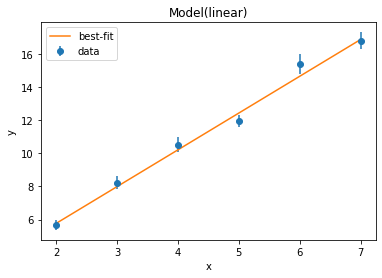

In [9]:
from lmfit.models import LinearModel
model = LinearModel()
result = model.fit(yi, x= xi, weights = 1/yerr)

result.plot_fit()
print(result.fit_report())

There are many different types of built-in models in lmfit, including Gaussians, Lorentzians, and polynomials. Let us give some more examples for how to fit different functions. In this next example, use this randomly generated data and fit it to a Gaussian distribution.

<ErrorbarContainer object of 3 artists>

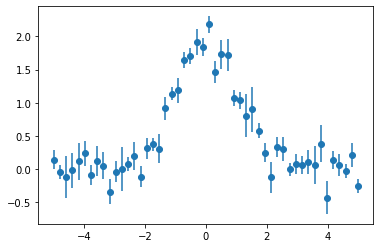

In [46]:
np.random.seed(2)
x = np.linspace(-5 , 5, 50)
yerr = 0.1+np.abs(0.1*np.random.normal(size = x.shape))

y = 5/(np.sqrt(2*np.pi*1.0))*np.exp(-0.5*x**2.0/1.0)+yerr*np.random.normal(size = x.shape)

plt.errorbar(x, y, yerr= yerr, fmt= 'o')

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 50
    # variables        = 3
    chi-square         = 52.4725341
    reduced chi-square = 1.11643689
    Akaike info crit   = 8.41334333
    Bayesian info crit = 14.1494123
[[Variables]]
    amplitude:  4.86908615 +/- 0.16166773 (3.32%) (init = 1)
    center:    -0.01951388 +/- 0.03789571 (194.20%) (init = 0)
    sigma:      0.99303398 +/- 0.03811848 (3.84%) (init = 1)
    fwhm:       2.33841628 +/- 0.08976215 (3.84%) == '2.3548200*sigma'
    height:     1.95611073 +/- 0.06460494 (3.30%) == '0.3989423*amplitude/max(2.220446049250313e-16, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma)  =  0.583
    C(amplitude, center) =  0.146


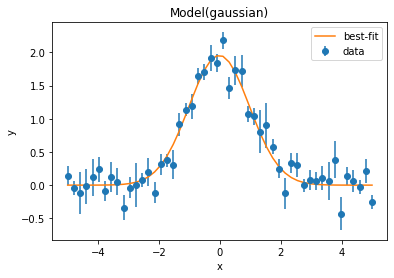

In [53]:
from lmfit.models import GaussianModel

gmodel = GaussianModel()

result = gmodel.fit(y, x=x, weights = 1/yerr)

print(result.fit_report())
result.plot_fit()

Note that we can also construct models based on user defined functions. In this case, we need to be careful about the initial values and the limits that we set on the maximum and minimum values.

In [116]:
def weird_model(x, a, b, c):
    return a*np.sin(10*x) + b*np.exp(x)+ c*np.log(x)

<ErrorbarContainer object of 3 artists>

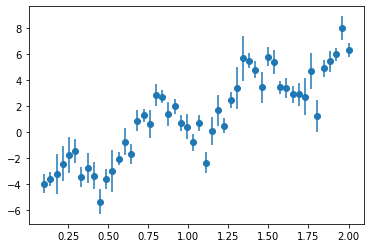

In [117]:
np.random.seed(2)
x = np.linspace(0.1 , 2, 50)
yerr = 0.5+np.abs(0.5*np.random.normal(size = x.shape))

y = weird_model(x, 2, 0.5, 3)+yerr*np.random.normal(size = x.shape)

plt.errorbar(x, y, yerr= yerr, fmt= 'o')

[[Model]]
    Model(weird_model)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 8
    # data points      = 50
    # variables        = 3
    chi-square         = 53.0253195
    reduced chi-square = 1.12819829
    Akaike info crit   = 8.93732605
    Bayesian info crit = 14.6733951
[[Variables]]
    a:  2.07648333 +/- 0.17162287 (8.27%) (init = 1)
    b:  0.48321130 +/- 0.03076761 (6.37%) (init = 1)
    c:  3.03502119 +/- 0.16372744 (5.39%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(b, c) = -0.284
    C(a, c) =  0.229
    C(a, b) = -0.197


(<Figure size 432x432 with 2 Axes>, GridSpec(2, 1, height_ratios=[1, 4]))

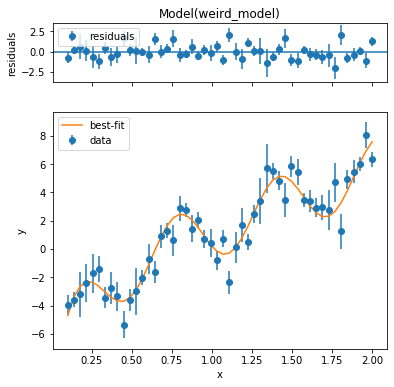

In [118]:
from lmfit.models import Model

wmodel = Model(weird_model)

wmodel.set_param_hint(name = 'a', value= 1, min = -np.inf, max =np.inf)
wmodel.set_param_hint(name = 'b', value= 1, min = -np.inf, max =np.inf)
wmodel.set_param_hint(name = 'c', value= 1, min = -np.inf, max =np.inf)

wmodel_result = wmodel.fit(y, x=x, weights = 1/yerr)
print(wmodel_result.fit_report())
wmodel_result.plot()

<lmfit.Model: Model(weird_model)>